# What is UMAP?


Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

# Why UMAP?

* UMAP is fast. It can handle large datasets and high dimensional data without too much difficulty, scaling beyond what most t-SNE packages can manage.

* UMAP scales well in embedding dimension -- it isn't just for visualisation! You can use UMAP as a general purpose dimension reduction technique as a preliminary step to other machine learning tasks. With a little care (documentation on how to be careful is coming) it partners well with the hdbscan clustering library.

* UMAP often performs better at preserving aspects of global structure of the data than t-SNE. This means that it can often provide a better "big picture" view of your data as well as preserving local neighbor relations.

* UMAP supports a wide variety of distance functions, including non-metric distance functions such as cosine distance and correlation distance. You can finally embed word vectors properly using cosine distance!

* UMAP supports adding new points to an existing embedding via the standard sklearn transform method. This means that UMAP can be used as a preprocessing transformer in sklearn pipelines.

* UMAP supports supervised and semi-supervised dimension reduction. This means that if you have label information that you wish to use as extra information for dimension reduction (even if it is just partial labelling) you can do that -- as simply as providing it as the y parameter in the fit method.

* UMAP has solid theoretical foundations in manifold learning (see the paper on ArXiv). This both justifies the approach and allows for further extensions that will soon be added to the library (embedding dataframes etc.).


Read more here: https://github.com/lmcinnes/umap

**The purpose of the kernel is to introduce UMAP implementation in Python**


Sample:

![](https://umap-learn.readthedocs.io/en/latest/_images/clustering_6_1.png)

# Libraries 

In [1]:
# import umap
import umap.umap_ as umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the training dataset

In [2]:
fashion_train = pd.read_csv("input/fashion-mnist_train.csv")

### Splitting Class Variable and Other Training data

In [3]:
data = fashion_train.iloc[:, 1:].values.astype(np.float32)
target = fashion_train['label'].values

 ### Creating a 2-dimensional representation of the data

In [4]:
reduce = umap.UMAP(random_state = 223) #just for reproducibility
embedding = reduce.fit_transform(data)

### Making the representation a Pandas Dataframe for Modelling and Visualization Purposes

In [5]:
df = pd.DataFrame(embedding, columns=('x', 'y'))
df["class"] = target

### Replacing Class numeric Values with Fashion Labels 

In [6]:
labels = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

df["class"].replace(labels, inplace=True)

# Visualizing the reduced Dataframe

C:\Users\Антон\PycharmProjects\cluster_vizualization\venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


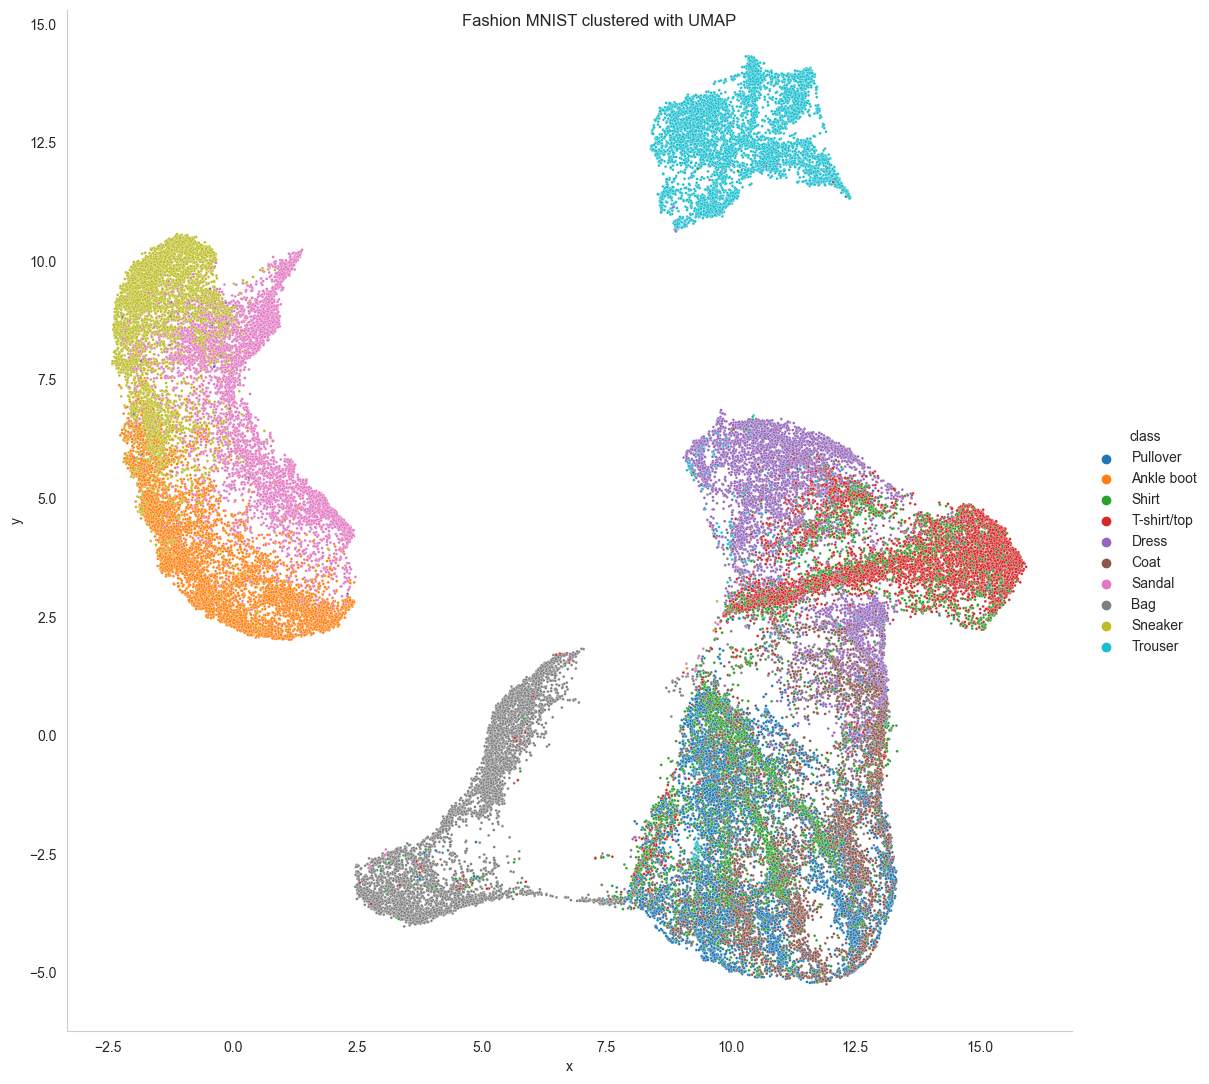

In [7]:
sns.set_style("whitegrid", {'axes.grid' : False})
#adjusting plot dots with plot_kws
ax = sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",size=11, plot_kws={"s": 4});
ax.fig.suptitle('Fashion MNIST clustered with UMAP') ;

### Let's make it Interactive with a 3D Plot!

In [9]:
#code courtesy: @huseinzol05 
#copied from here: https://www.kaggle.com/huseinzol05/3d-visualization
from ast import literal_eval
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']
data_graph = []
for no, name in enumerate(np.unique(df["class"])):
    graph = go.Scatter3d(
    x = df[df["class"] == name]["x"],
    y = df[df["class"] == name]["y"],
    z = df[df["class"] == name]["class"],
    name = labels[no],
    mode = 'markers',
    marker = dict(
        size = 12,
        line = dict(
            color = '#%02x%02x%02x' % literal_eval(colors[no][3:]),
            width = 0.5
            ),
        opacity = 0.5
        )
    )
    data_graph.append(graph)
    
layout = go.Layout(
    scene = dict(
        camera = dict(
            eye = dict(
            x = 0.5,
            y = 0.5,
            z = 0.5
            )
        )
    ),
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 0
    )
)
fig = go.Figure(data = data_graph, layout = layout)
py.iplot(fig, filename = '3d-scatter')

### References

The details for the underlying mathematics can be found in the paper on [ArXiv](https://arxiv.org/abs/1802.03426) :

McInnes, L, Healy, J, *UMAP: Uniform Manifold Approximation and Projection
for Dimension Reduction*, ArXiv e-prints 1802.03426, 2018

The important thing is that you don't need to worry about that -- you can use
UMAP right now for dimension reduction and visualisation as easily as a drop
in replacement for scikit-learn's t-SNE.

Documentation is available via [ReadTheDocs](https://umap-learn.readthedocs.io/).

### UMAP in R

For R users, There is a package avaialble that wraps on the above mentioned Python package.

https://github.com/ropenscilabs/umapr